In [1]:
# =======================
# 1. Import libraries
# =======================
import pandas as pd   # For data analysis
import numpy as np    # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization

# =======================
# 2. Load dataset
# =======================
file_path = "imdb_movies.csv"   
df = pd.read_csv (r"C:\Users\sky1m\Downloads\imdb_movies.csv\imdb_movies.csv")


In [2]:
# Shape of the dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (10178, 12)


In [3]:
# First 5 rows
print(df.head())

                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                         

In [4]:
# Column details
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
None


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10178.0,6.349705e+01,1.353701e+01,0.0,59.0,65.0,71.0,1.000000e+02
budget_x,10178.0,6.488238e+07,5.707565e+07,1.0,15000000.0,50000000.0,105000000.0,4.600000e+08
revenue,10178.0,2.531401e+08,2.777880e+08,0.0,28588985.0,152934876.5,417802077.1,2.923706e+09


In [6]:
# Check missing values in each column
print(df.isnull().sum())

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64


In [7]:
# Handling missing values

# Fill missing genre with "Unknown"
df['genre'] = df['genre'].fillna("Unknown")

# Fill missing crew with "Not Available"
df['crew'] = df['crew'].fillna("Not Available")

# Verify again
print(df.isnull().sum())


names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64


In [8]:
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')


In [9]:
df['score_10'] = df['score'] / 10


In [10]:
df['budget_x'] = df['budget_x'].astype('int64')
df['revenue'] = df['revenue'].astype('int64')


In [11]:
print (df.dtypes)

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x               int64
revenue                int64
country               object
score_10             float64
dtype: object


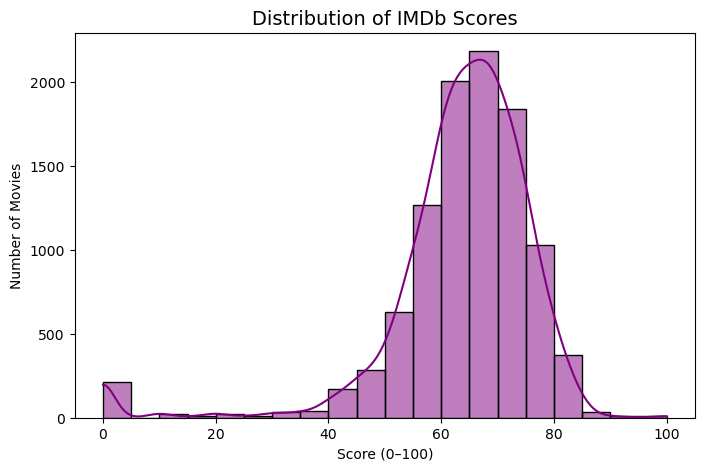

In [12]:
# Histogram of IMDb scores (0–100 scale)
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=20, kde=True, color="purple")
plt.title("Distribution of IMDb Scores", fontsize=14)
plt.xlabel("Score (0–100)")
plt.ylabel("Number of Movies")
plt.show()


In [13]:
# Split genres and count frequency
genre_counts = (
    df['genre']
    .str.split(",")             
    .explode()                  
    .str.strip()                 
    .value_counts()
)

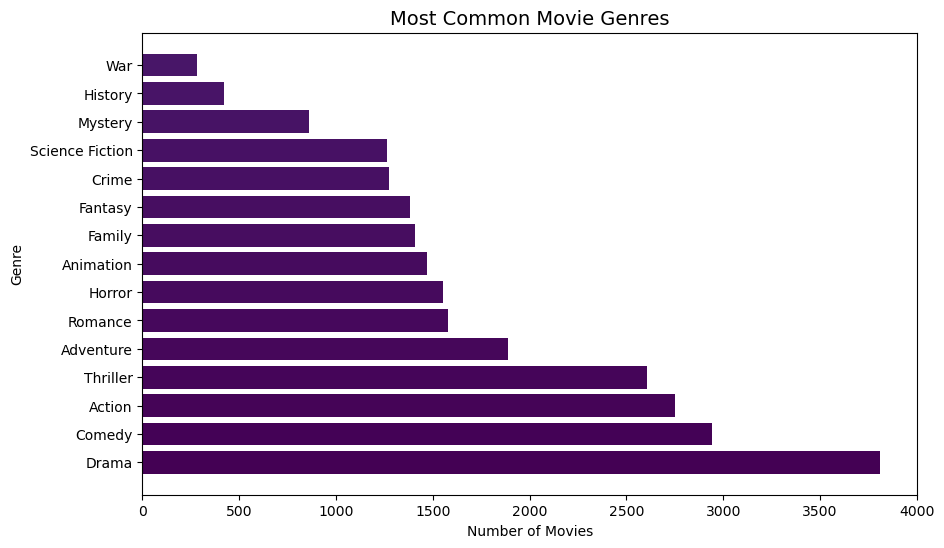

In [14]:
# Plot top 15 genres
plt.figure(figsize=(10,6))
plt.barh(genre_counts.head(15).index, genre_counts.head(15).values, color=plt.cm.viridis(range(15)))
plt.title("Most Common Movie Genres", fontsize=14)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


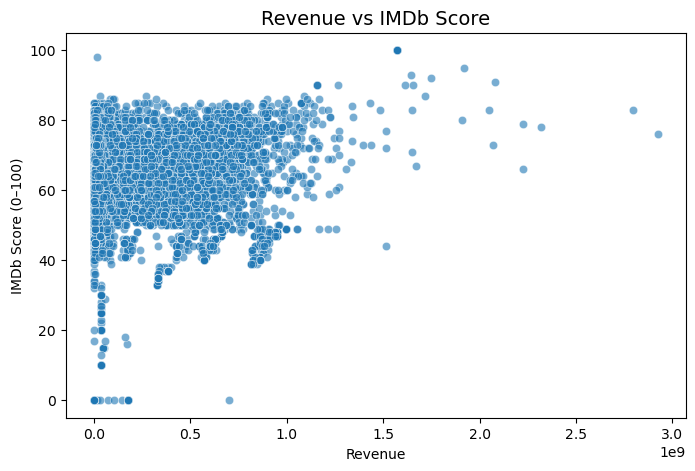

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['revenue'], y=df['score'], alpha=0.6)
plt.title("Revenue vs IMDb Score", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("IMDb Score (0–100)")
plt.show()



In [16]:
# Expand genres into separate rows
df_genres = df.copy()
df_genres = df_genres.assign(genre=df_genres['genre'].str.split(","))
df_genres = df_genres.explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()  


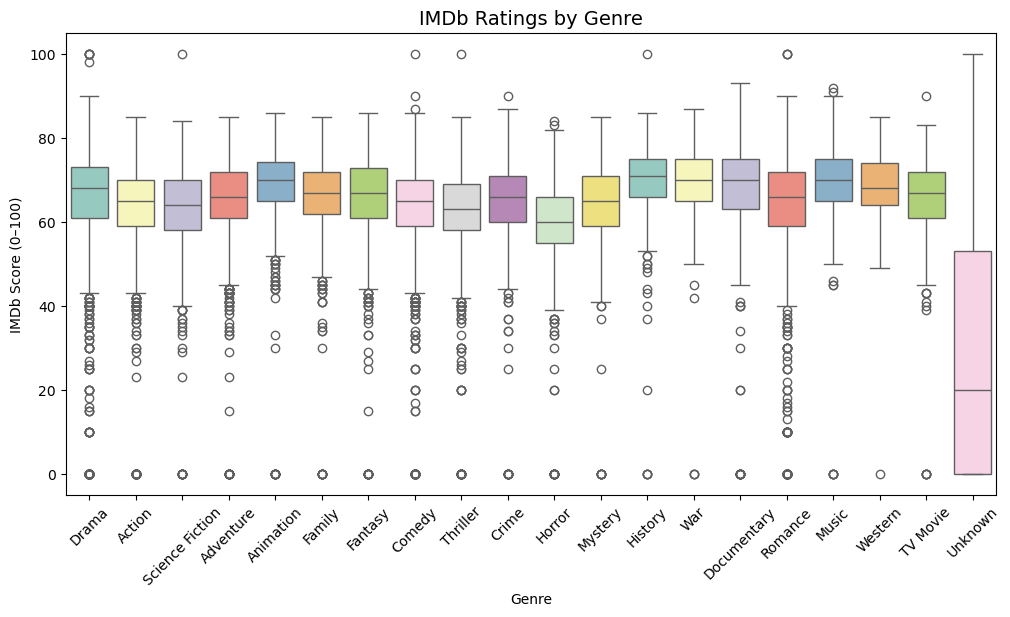

In [17]:
# Boxplot of score distribution by genre
plt.figure(figsize=(12,6))
sns.boxplot(
    x="genre", 
    y="score", 
    data=df_genres, 
    hue="genre",          
    palette="Set3", 
    legend=False          
)
plt.xticks(rotation=45)
plt.title("IMDb Ratings by Genre", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("IMDb Score (0–100)")
plt.show()



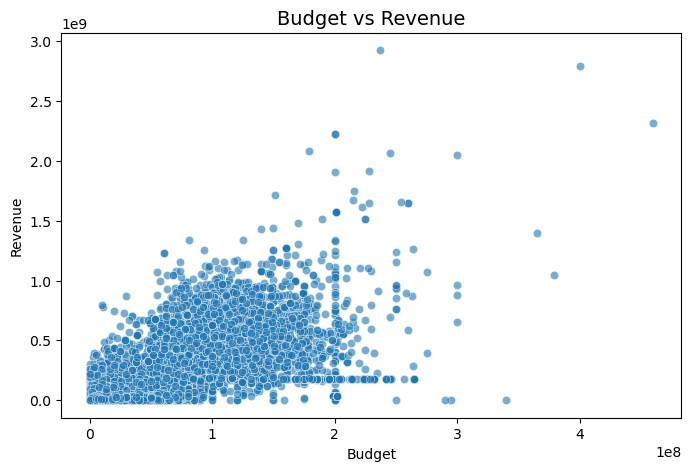

In [18]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['budget_x'], y=df['revenue'], alpha=0.6)
plt.title("Budget vs Revenue", fontsize=14)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [19]:
# Correlation coefficient
corr = df['budget_x'].corr(df['revenue'])
print("Correlation between Budget and Revenue:", corr)

Correlation between Budget and Revenue: 0.6738295691054467


In [20]:
# Calculate average score per genre
avg_ratings = df_genres.groupby('genre')['score'].mean().sort_values(ascending=False)

In [21]:
# Display top genre
print("Genre with highest average rating:", avg_ratings.index[0], "→", round(avg_ratings.iloc[0], 2))

Genre with highest average rating: History → 69.16


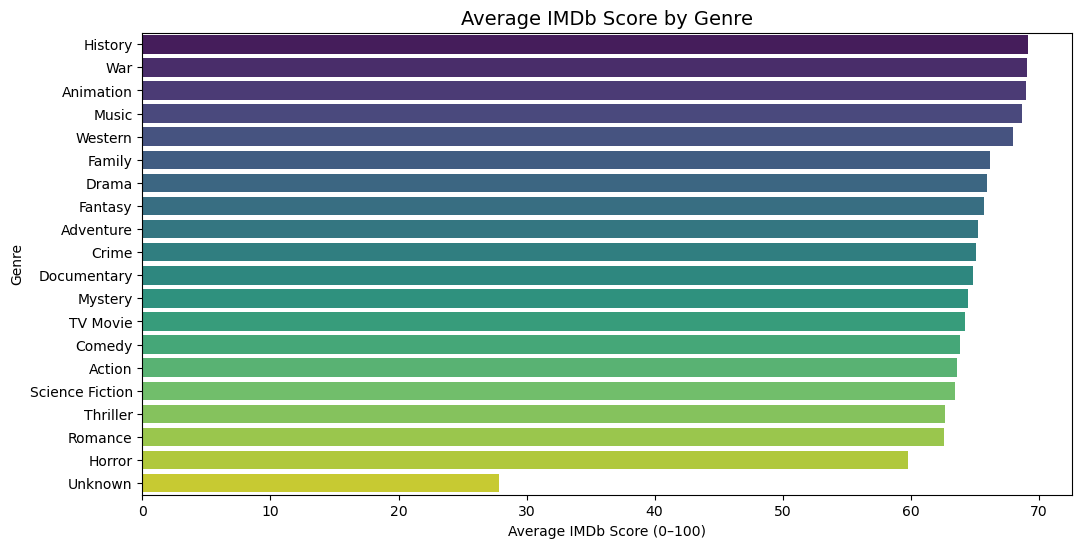

In [22]:
# Plot average ratings by genre
plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_ratings.values, 
    y=avg_ratings.index, 
    hue=avg_ratings.index,   
    palette="viridis", 
    legend=False             
)
plt.title("Average IMDb Score by Genre", fontsize=14)
plt.xlabel("Average IMDb Score (0–100)")
plt.ylabel("Genre")
plt.show()


In [23]:
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

df['release_year'] = df['date_x'].dt.year

df_genres = df.copy()
df_genres = df_genres.assign(genre=df_genres['genre'].str.split(","))
df_genres = df_genres.explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()

genre_trends = (
    df_genres.groupby(['release_year', 'genre'])
    .size()
    .reset_index(name='count')
)

top_genres = df_genres['genre'].value_counts().head(5).index


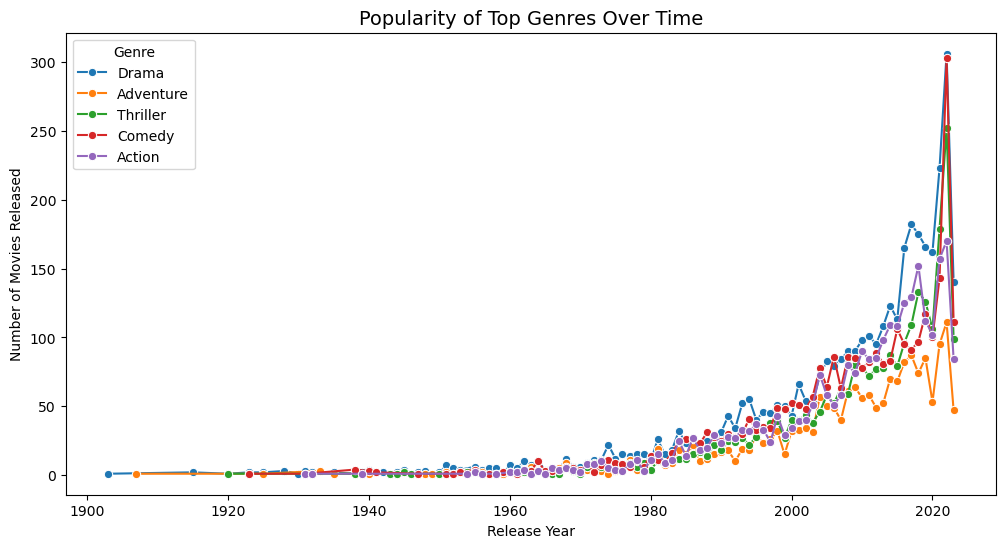

In [24]:
# Pick top 5 genres for clear visualization
plt.figure(figsize=(12,6))
sns.lineplot(
    data=genre_trends[genre_trends['genre'].isin(top_genres)],
    x='release_year', y='count', hue='genre', marker="o"
)
plt.title("Popularity of Top Genres Over Time", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies Released")
plt.legend(title="Genre")
plt.show()

In [25]:
avg_rating_per_year = (
    df.groupby('release_year')['score']
    .mean()
    .reset_index()
)

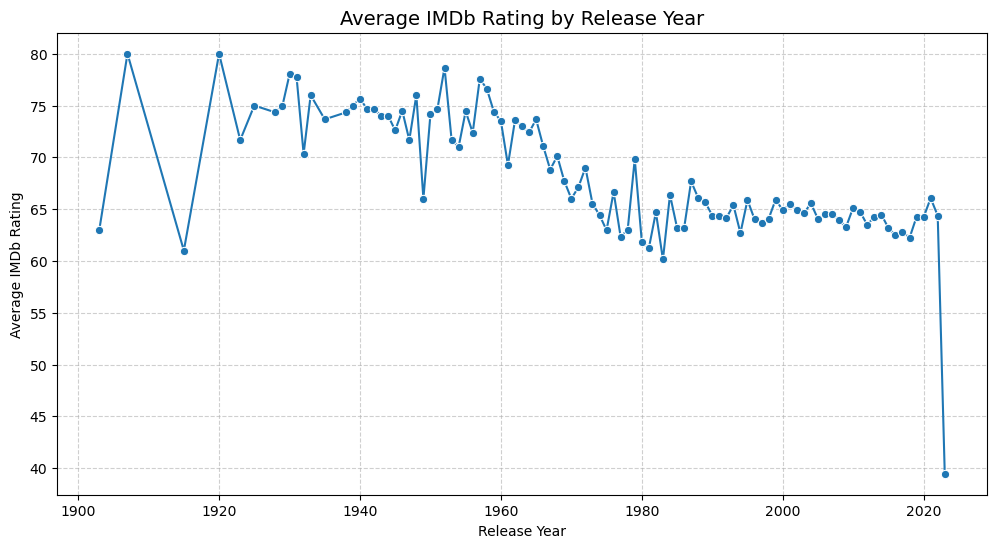

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rating_per_year, x='release_year', y='score', marker="o")
plt.title("Average IMDb Rating by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Rating")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [27]:
movies_per_year = (
    df.groupby('release_year')
    .size()
    .reset_index(name='count')
)

In [28]:
max_year = movies_per_year.loc[movies_per_year['count'].idxmax()]
min_year = movies_per_year.loc[movies_per_year['count'].idxmin()]

print(f"📌 Year with most releases: {int(max_year['release_year'])} ({max_year['count']} movies)")
print(f"📌 Year with fewest releases: {int(min_year['release_year'])} ({min_year['count']} movies)")


📌 Year with most releases: 2022 (954 movies)
📌 Year with fewest releases: 1903 (1 movies)


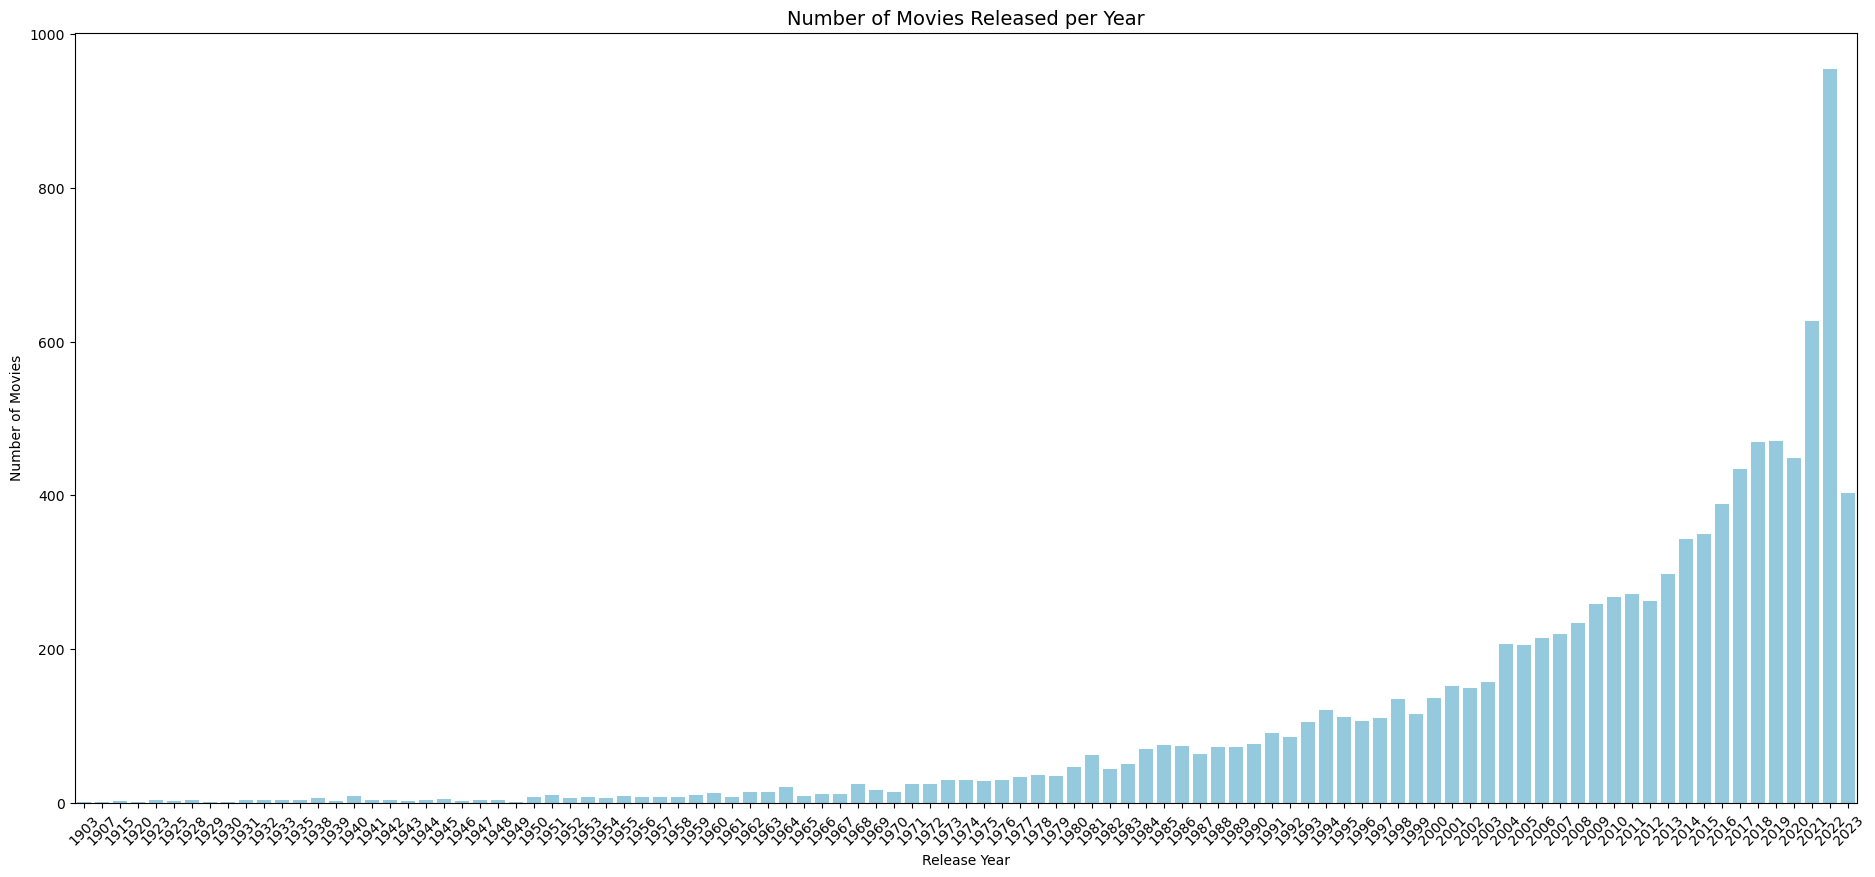

In [29]:
plt.figure(figsize=(23,10))
sns.barplot(data=movies_per_year, x='release_year', y='count', color="skyblue")
plt.title("Number of Movies Released per Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [30]:
df = df.dropna(subset=['release_year'])

In [31]:
df['decade'] = (df['release_year'] // 10) * 10

In [32]:
df_genres = df.dropna(subset=['genre']).copy()
df_genres['genre'] = df_genres['genre'].str.split(',')

In [33]:
df_genres = df_genres.explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()

In [34]:
genre_decade_counts = (
    df_genres.groupby(['decade', 'genre'])
    .size()
    .reset_index(name='count')
)

In [35]:
top_genres_per_decade = (
    genre_decade_counts.sort_values(['decade', 'count'], ascending=[True, False])
    .groupby('decade')
    .head(1)
)

print("Most popular genre by decade:\n", top_genres_per_decade)


Most popular genre by decade:
      decade      genre  count
0      1900  Adventure      1
4      1910      Drama      2
10     1920      Drama      8
24     1930      Drama     11
39     1940      Drama     20
55     1950      Drama     39
72     1960      Drama     68
91     1970      Drama    130
110    1980      Drama    215
130    1990      Drama    447
150    2000      Drama    714
170    2010      Drama   1326
190    2020      Drama    831


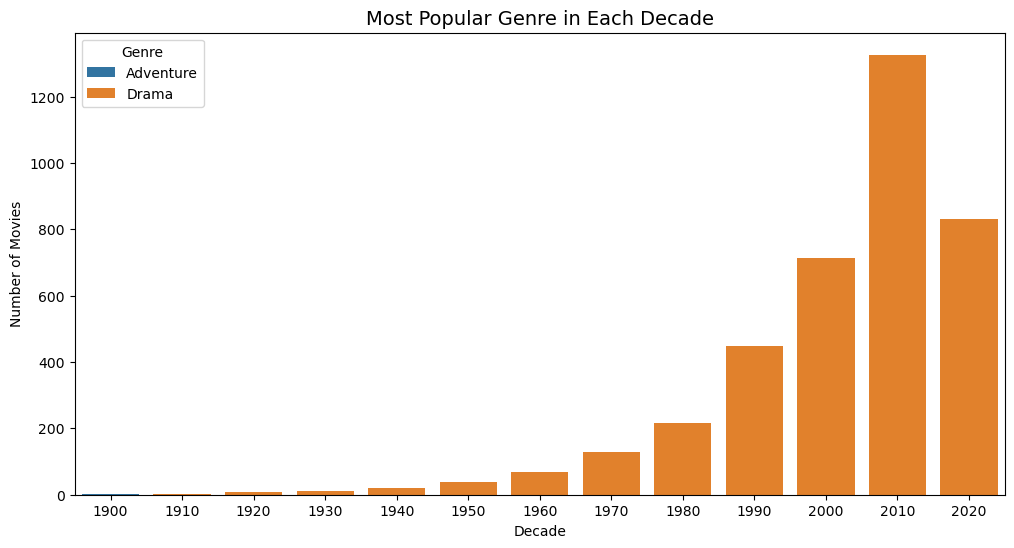

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_genres_per_decade, x='decade', y='count', hue='genre', dodge=False, palette="tab10")
plt.title("Most Popular Genre in Each Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.legend(title="Genre")
plt.show()

In [37]:
numeric_df = df[['budget_x', 'revenue', 'score']].dropna()


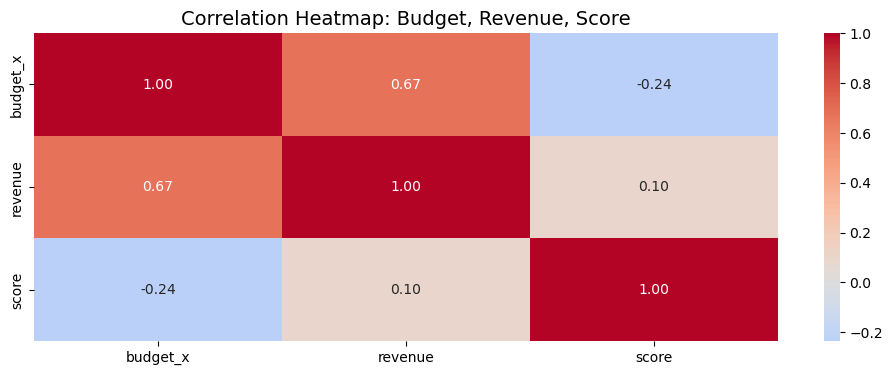

In [38]:
plt.figure(figsize=(12,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap: Budget, Revenue, Score", fontsize=14)
plt.show()

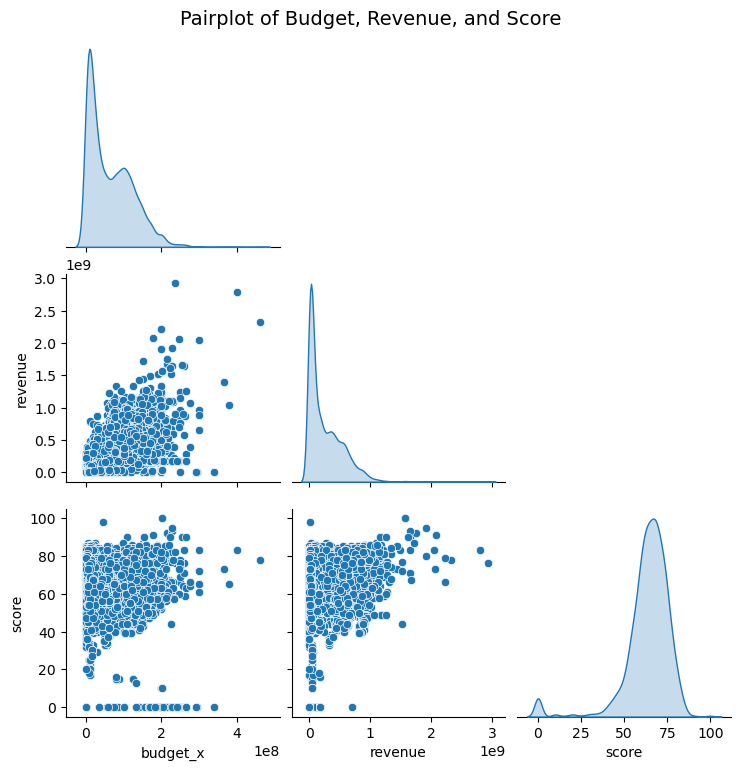

In [39]:
sns.pairplot(numeric_df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Budget, Revenue, and Score", y=1.02, fontsize=14)
plt.show()

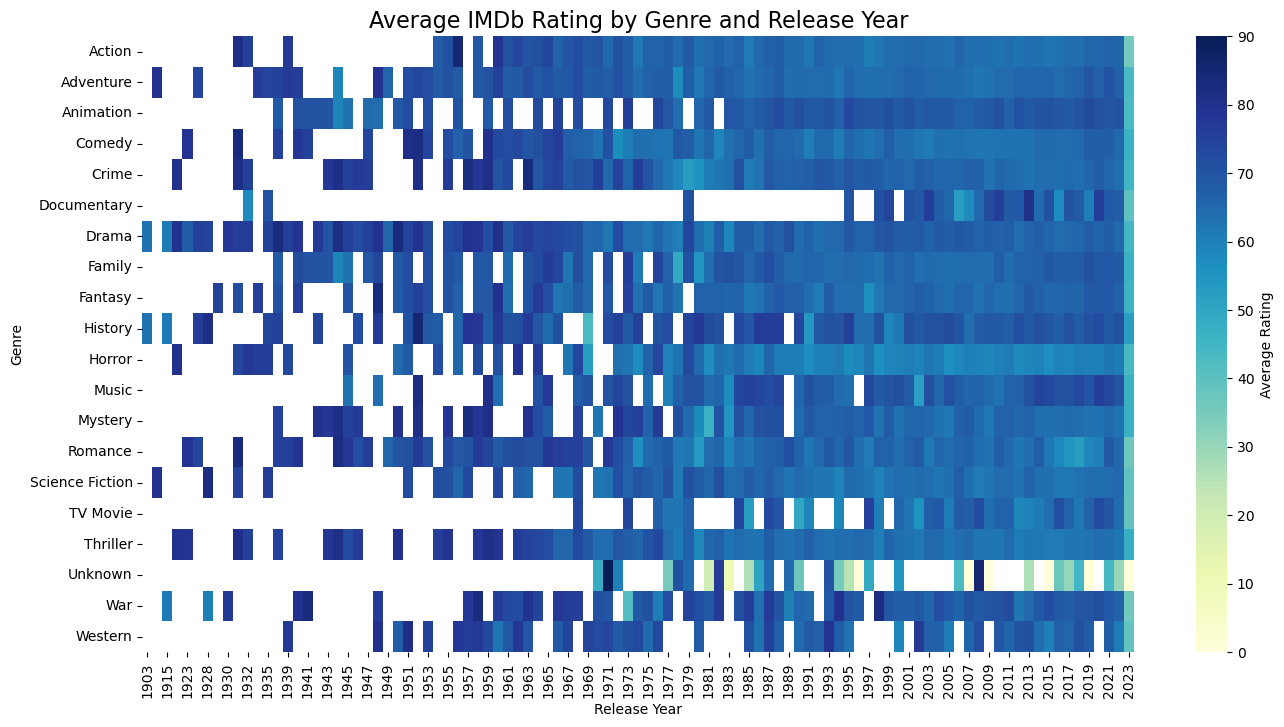

In [44]:
df_genres = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()


avg_ratings = (
    df_genres.groupby(['release_year', 'genre'])['score']
    .mean()
    .reset_index())


pivot_table = avg_ratings.pivot_table(index="genre", columns="release_year", values="score")


plt.figure(figsize=(16,8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Average Rating'})
plt.title("Average IMDb Rating by Genre and Release Year", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()


In [46]:
if "decade" not in df.columns:
    df["decade"] = (df["release_year"] // 10) * 10

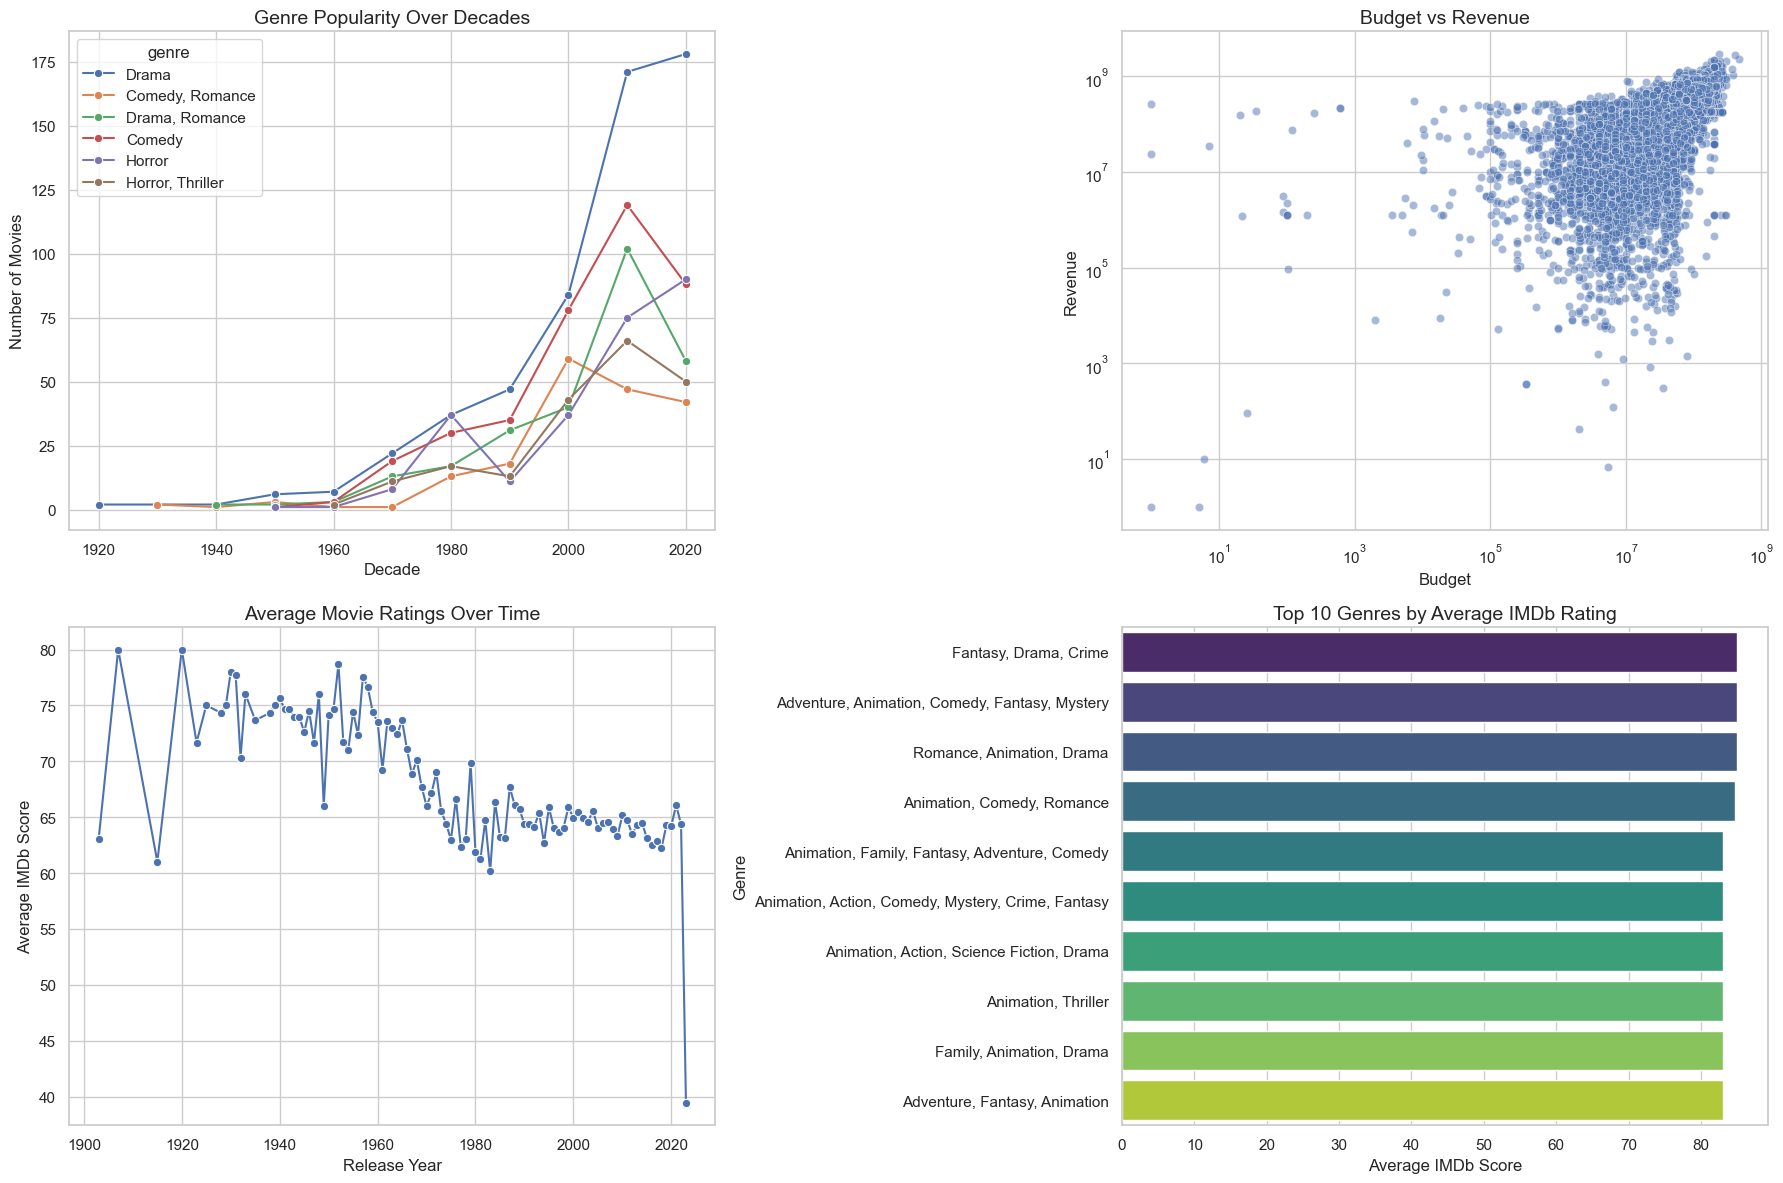

In [51]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

genre_counts = df.groupby(["decade", "genre"]).size().reset_index(name="count")
top_genres = genre_counts.groupby("genre")["count"].sum().sort_values(ascending=False).head(6).index
filtered_genres = genre_counts[genre_counts["genre"].isin(top_genres)]
sns.lineplot(data=filtered_genres, x="decade", y="count", hue="genre", marker="o", ax=axes[0,0])
axes[0,0].set_title("Genre Popularity Over Decades", fontsize=14)
axes[0,0].set_ylabel("Number of Movies")
axes[0,0].set_xlabel("Decade")

sns.scatterplot(data=df, x="budget_x", y="revenue", alpha=0.5, ax=axes[0,1])
axes[0,1].set_title("Budget vs Revenue", fontsize=14)
axes[0,1].set_xlabel("Budget")
axes[0,1].set_ylabel("Revenue")
axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")

avg_ratings = df.groupby("release_year")["score"].mean().reset_index()
sns.lineplot(data=avg_ratings, x="release_year", y="score", marker="o", ax=axes[1,0])
axes[1,0].set_title("Average Movie Ratings Over Time", fontsize=14)
axes[1,0].set_ylabel("Average IMDb Score")
axes[1,0].set_xlabel("Release Year")

avg_genre_ratings = df.groupby("genre")["score"].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_genre_ratings.head(10),x="score", y="genre",hue="genre",palette="viridis",legend=False,ax=axes[1,1])
axes[1,1].set_title("Top 10 Genres by Average IMDb Rating", fontsize=14)
axes[1,1].set_xlabel("Average IMDb Score")
axes[1,1].set_ylabel("Genre")

plt.tight_layout()
plt.show()

Additional Questions to Explore with Current Data

1. Genre profitability

   Which genres give the highest return on investment (ROI = revenue ÷ budget)?

   Do high-budget genres always lead to higher revenue?

2. Language & Country trends

   Do movies in certain languages or countries score higher on average?

   Which countries produce the most profitable or highest-rated films?

3. Crew/Director influence

   Are certain directors or writers consistently associated with high scores?

   Does the presence of well-known crew members (e.g., top directors) boost revenue or ratings?

4. Revenue vs. Ratings

   Do critically acclaimed movies (high score) always make money?

   Or are there “blockbusters” with low ratings but huge revenue?

5. Release timing

   Are movies released in specific months or decades more successful?

   Is there a seasonal effect (e.g., summer blockbusters vs. award-season films)?

6. Genre shifts over decades

   How has the dominance of genres (like action, drama, comedy) shifted across decades?

   Do “trendy” genres emerge at certain points in history?

7. Additional Data That Would Be Helpful

   Audience demographics (age, gender, region) → to see which groups prefer which genres.

   Box office details (domestic vs. international revenue, opening weekend collections).

   Streaming data (post-theatrical performance, Netflix/Prime popularity).

   Critic reviews vs. audience ratings (e.g., Rotten Tomatoes, Metacritic) → to study the “critics vs. fans” gap.

   Awards data (Oscars, Golden Globes) → to analyze how awards impact revenue/ratings.

   Marketing budget / promotion data → to test if big advertising correlates with success.